<a href="https://colab.research.google.com/github/ej29-r3d/Decision-Tree-and-Random-Forest-for-Customer-Classification/blob/main/Decision_Tree_and_Random_Forest_for_Customer_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math

Start by mounting the Google Drive in order to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the "ExtraaLearn.csv" dataset

data = pd.read_csv('/content/drive/My Drive/MIT_Data_Science/Elective_project/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Check the DataFrame’s dimensions
data.shape

(4612, 15)

In [ ]:
# Info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- There are 4612 rows and 14 columns
- All features contain non-null entries
- 4 features with numeric values, 11 features with caterical values
  - Technically there are 5 numerical features, but 'Status' column cotains only {0,1} values as we see later. So it will be more logicaly to allocate it into categorical columns

In [ ]:
# Create lists with numerical and categorical columns
num_cols = ['website_visits', 'time_spent_on_website', 'page_views_per_visit',  'age']
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']

In [ ]:
# Check missing values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

There are no missing values

In [ ]:
# Check for duplicated data
data.duplicated().sum()

0

In [ ]:
# Look at the rows that are duplicated
data[data.duplicated()]

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status


- Actualy these 14 rows are not duplicated.
- They contain data about customers that haven't any activity. But these clients are not the same as we can see in such columns as 'age', 'current_occupation', etc.

In [ ]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


- 'ID' column is unique for each client. It can be dropped for simplicity as it doesn't any additional value for the analysis
- Let's convert this column into the index of dataframe

In [ ]:
# Set 'ID' as the index
data.set_index('ID', inplace=True)

data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
ID,,,,,,,,,,,,,,
EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Univariate Analysis

## Analyze Numerical columns

In [ ]:
# Checking summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


### Website Visits

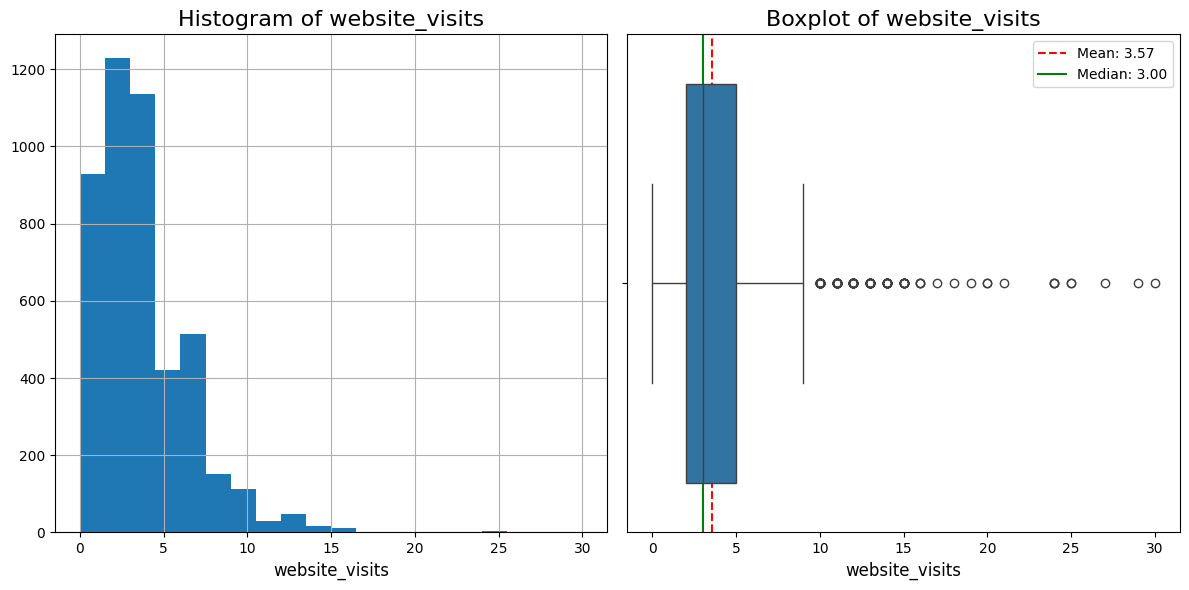

In [ ]:
# Creating histogram and boxplot
num_feature = 'website_visits'

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title(f'Histogram of {num_feature}', fontsize=16)
plt.xlabel(num_feature, fontsize=12)

data[num_feature].hist(bins = 20)
plt.subplot(1, 2, 2)
plt.title(f'Boxplot of {num_feature}', fontsize=16)
plt.xlabel(num_feature, fontsize=12)

# Adding annotations for mean and median
mean_value = data[num_feature].mean()
median_value = data[num_feature].median()

plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')

sns.boxplot(x = data[num_feature],legend='full')

# Display the legend
plt.legend()

plt.tight_layout()
plt.show()

Most of customers visited website from 0 to 5 times. Meanwhile there is a significant number of clients that visited it from 5 to 10 times, and not so significant but long taleof clients visited it more than 10 time. Distribution is right-skewed


### Time Spend on website

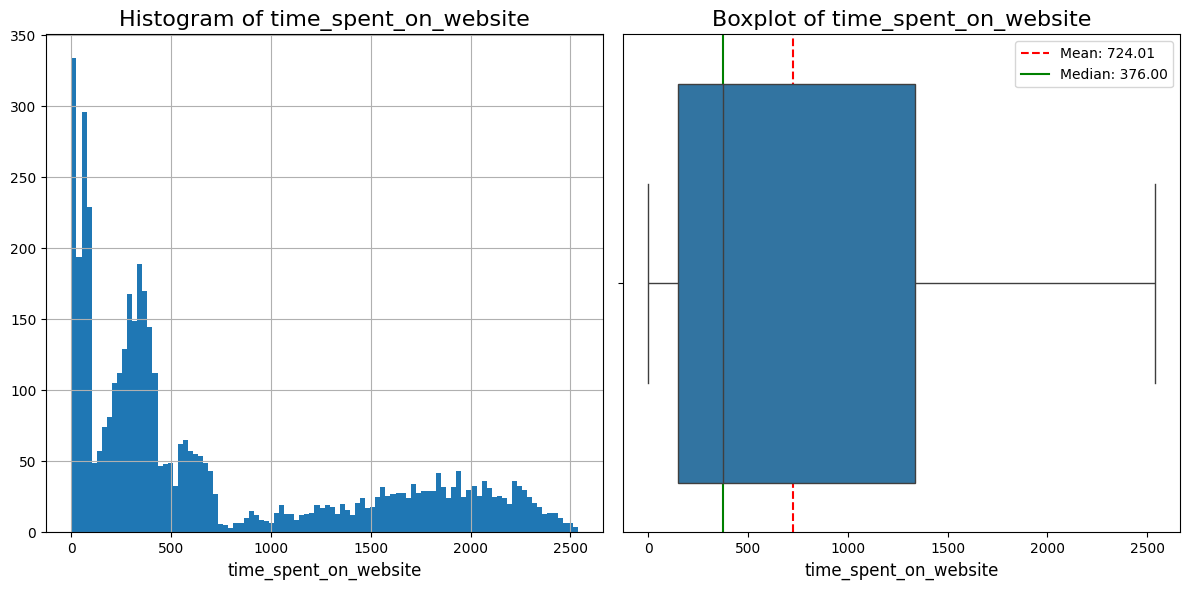

In [ ]:
# Creating histogram and boxplot
num_feature = 'time_spent_on_website'

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title(f'Histogram of {num_feature}', fontsize=16)
plt.xlabel(num_feature, fontsize=12)

data[num_feature].hist(bins = 100)
plt.subplot(1, 2, 2)
plt.title(f'Boxplot of {num_feature}', fontsize=16)
plt.xlabel(num_feature, fontsize=12)

# Adding annotations for mean and median
mean_value = data[num_feature].mean()
median_value = data[num_feature].median()

plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')

sns.boxplot(x = data[num_feature],legend='full')

# Display the legend
plt.legend()

plt.tight_layout()
plt.show()

- There is a big variation among number of time spend on website
- A lot of clients spent 0 or 1 second on website. That means that website is not relevant for them
- Also there are several other clusters of clients:
  - Spent less than ~100 seconds
  - Spent ~300 seconds. Median value for all customers is 376 seconds
  - Spent ~500-700 seconds
  - Long tale of customers that spent from 700 to 2500 seconds. This cluster of customers may be very important for a company. Mean is very different from median because of that long tale

### Page views per visit

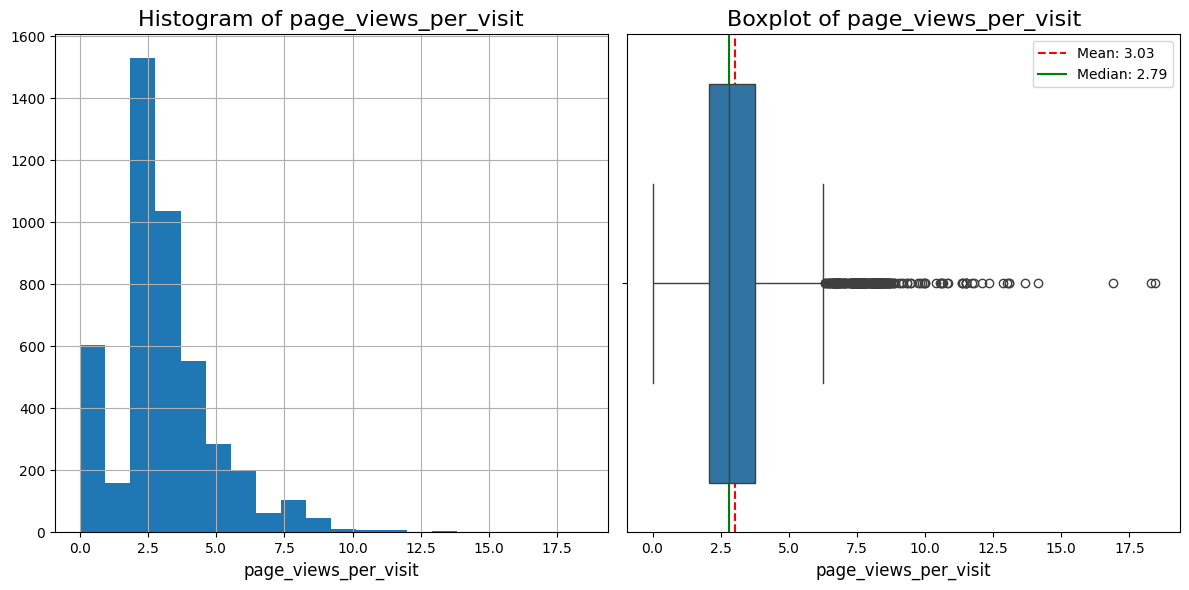

In [ ]:
# Creating histogram and boxplot
num_feature = 'page_views_per_visit'

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title(f'Histogram of {num_feature}', fontsize=16)
plt.xlabel(num_feature, fontsize=12)

data[num_feature].hist(bins = 20)
plt.subplot(1, 2, 2)
plt.title(f'Boxplot of {num_feature}', fontsize=16)
plt.xlabel(num_feature, fontsize=12)

# Adding annotations for mean and median
mean_value = data[num_feature].mean()
median_value = data[num_feature].median()

plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')

sns.boxplot(x = data[num_feature],legend='full')

# Display the legend
plt.legend()

plt.tight_layout()
plt.show()

- A lot of clients (~600) visited 0 pages
- Mean abd median is around 3 pages
- Distributio is right-skewed with some clients visited more than 5 pages

## Categorical columns

Let's create countplots for each categorical feature

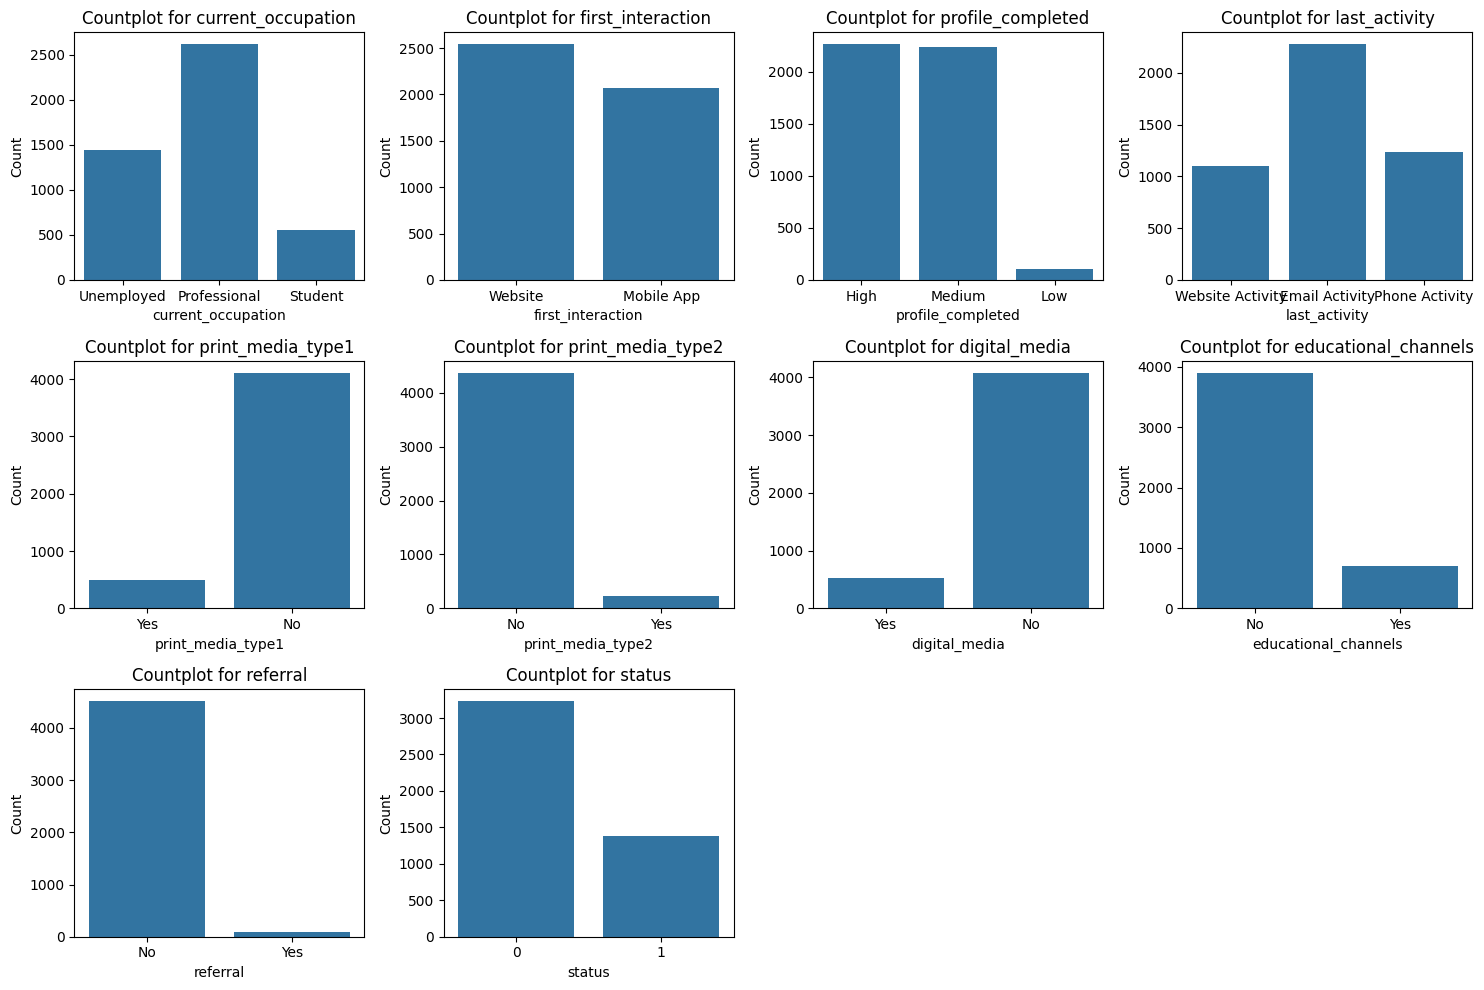

In [ ]:
nrows = 3  # Number of rows in grid
ncols = 4  # Number of columns

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

for i, column in enumerate(cat_cols):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=data, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'Countplot for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

- Most of customers are employed or unemployed and not students now
- Both mobile and website are important for the first time interaction, though website has advantage
- Only small fraction of customers has low profile completion
- Email is leading as the las activity channel. Website and mobile have the same performance
- Both print media types and digital media have low penetration
- Only ~1/4 of customers are paid

### How current occupation affects lead status

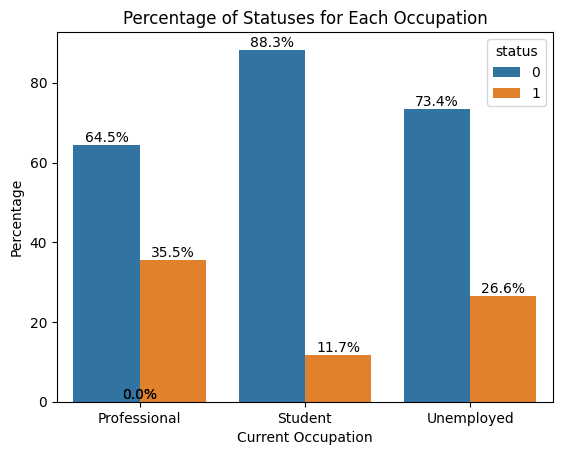

In [ ]:
# Calculate the count of each combination of occupation and status
counts = data.groupby(['current_occupation', 'status']).size().reset_index(name='count')

# Calculate the total count for each occupation
total_counts = counts.groupby('current_occupation')['count'].transform('sum')

# Calculate the percentage
counts['percentage'] = counts['count'] / total_counts * 100

# Create a plot
ax=sns.barplot(data=counts, x='current_occupation', y='percentage', hue='status')

# Add title and labels
plt.title('Percentage of Statuses for Each Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Percentage')

# Add percentage labels to the bars
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Show the plot
plt.show()

# sns.countplot(data=data, x='current_occupation', hue='status')

- Professionals are more eager to participate in program than unemployed (35.5% vs 26.6%)
- Only 11.7% of current students are eager to participate

### Do the first channels of interaction have an impact on the lead status?

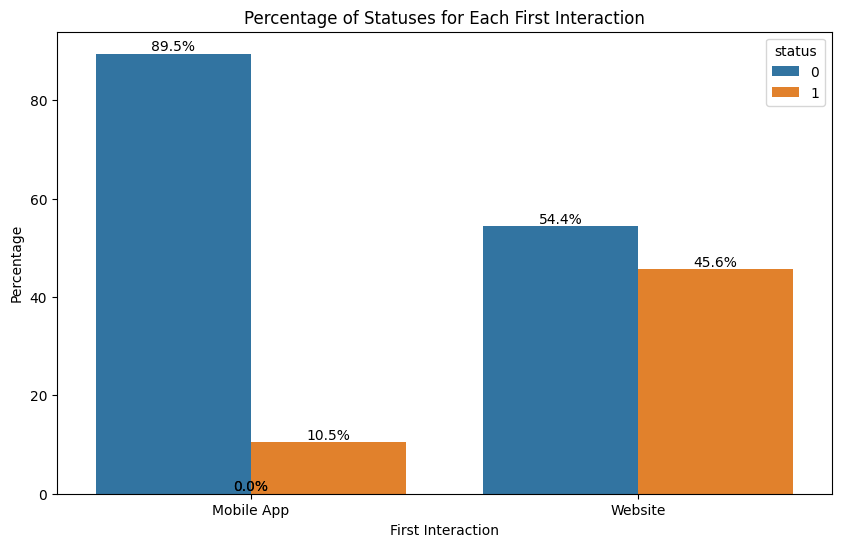

In [ ]:
# Calculate the count of each combination of interaction and status
counts = data.groupby(['first_interaction', 'status']).size().reset_index(name='count')

# Calculate the total count for each interaction
total_counts = counts.groupby('first_interaction')['count'].transform('sum')

# Calculate the percentage
counts['percentage'] = counts['count'] / total_counts * 100

# Initialize the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(data=counts, x='first_interaction', y='percentage', hue='status')

# Add title and labels
plt.title('Percentage of Statuses for Each First Interaction')
plt.xlabel('First Interaction')
plt.ylabel('Percentage')

# Add percentage labels to the bars
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Show the plot
plt.show()


- Mobile channel has very low conversion to paid clients - only 10.5%
- Conversion of Website is 4.5 times bigger

### Which way of interaction works best?

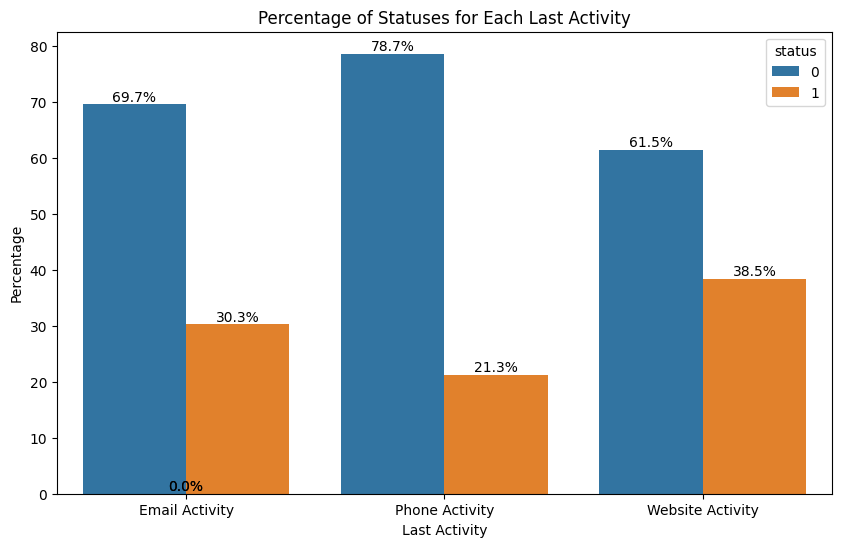

In [ ]:
# Calculate the count of each combination of last activity and status
last_activity_counts = data.groupby(['last_activity', 'status']).size().reset_index(name='count')

# Calculate the total count for each last activity
total_last_activity_counts = last_activity_counts.groupby('last_activity')['count'].transform('sum')

# Calculate the percentage
last_activity_counts['percentage'] = last_activity_counts['count'] / total_last_activity_counts * 100

# Initialize the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(data=last_activity_counts, x='last_activity', y='percentage', hue='status')

# Add title and labels
plt.title('Percentage of Statuses for Each Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Percentage')

# Add percentage labels to the bars
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Show the plot
plt.show()


- Website activity works best: ~40% of customers are paid
- Email activity is on the 2nd place with ~30% of paid customers
- Phone activity is not so efficient with ~20% of paid customers

### Which of channels have the highest lead conversion rate?

In [ ]:

channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for channel in channels:
  pivot_status = pivot.loc[pivot[channel] == 'Yes', 'status']
  print(f'Conversion of {channel} is \t\t', '{:.1%}'.format(pivot_status.sum()/pivot_status.count()))


Conversion of print_media_type1 is 		 29.9%
Conversion of print_media_type2 is 		 32.2%
Conversion of digital_media is 		 31.9%
Conversion of educational_channels is 		 27.9%
Conversion of referral is 		 67.7%


- Referral channel has the biggest lead conversion rate with 67.7%
- Other channels have the CR that is close to each other:
  - Newspapers: 29.9%
  - Magazines: 32.2%
  - Digital media: 31.9%
  - Educational Channels: 27.9%

## Does having more details about a prospect increase the chances of conversion?

In [ ]:
result = data.groupby('profile_completed')['status'].sum() / data.groupby('profile_completed')['status'].size()
print(result)


profile_completed
High      0.417845
Low       0.074766
Medium    0.188755
Name: status, dtype: float64


Complete information about a prospect has strong correlation with chances of conversion.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Create a copy of dataframe

df = data.copy()
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
ID,,,,,,,,,,,,,,
EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,Yes,No,No,Yes,No,0
EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,Yes,No,Yes,No,No,0
EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,Yes,No,No,No,No,1
EXT005,23,Student,Website,High,4,600,16.914,Email Activity,Yes,No,No,No,No,0


In [ ]:
# Convert categorical values into numerical representations

# Convert ordinal categorical variables
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['profile_completed'] = df['profile_completed'].map(ordinal_mapping)

# Convert nominal categorical variables using one-hot encoding
nominal_columns = ['first_interaction', 'last_activity']
df = pd.get_dummies(df, columns=nominal_columns)

# Convert binary categorical variables
binary_columns = ['referral', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

df.head()

,age,current_occupation,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,first_interaction_Mobile App,first_interaction_Website,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity
ID,,,,,,,,,,,,,,,,,
EXT001,57,Unemployed,3,7,1639,1.861,1,0,1,0,0,1,False,True,False,False,True
EXT002,56,Professional,2,2,83,0.320,1,0,0,1,0,0,True,False,False,False,True
EXT003,52,Professional,2,3,330,0.074,1,0,1,0,0,0,False,True,False,False,True
EXT004,53,Unemployed,3,4,464,2.057,1,0,0,0,0,1,False,True,False,False,True
EXT005,23,Student,3,4,600,16.914,1,0,0,0,0,0,False,True,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

## Building a Decision Tree model

## Model Performance evaluation and improvement

## Building a Random Forest model

## Model Performance evaluation and improvement

## Actionable Insights and Recommendations